In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [2]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## Initialize light curve

In [3]:
toiid = 1696
s=cr.ShortCadence(toiid=toiid)
s

Target: TOI 1696
Available sectors: [19]
Using sector=19.
Searching lightcurvefile for TIC 470381900 (sector 19).
Found 1 lightcurve(s).
Using TESS short cadence.



ShortCadence(mission=tess, toiid=1696, ticid=470381900, target_coord=(65.2807,48.8198), all_sectors=[19], search_radius=3.0 arcsec, sap_mask=pipeline, quality_bitmask=default, calc_fpp=False)

## SAP

In [4]:
#download PDCSAP lc
sap = s.get_lc(lctype='sap')

sap = sap.remove_outliers(sigma_upper=5)

Duration should be in hours.
Using period=2.5007 d, epoch=1816.70 BTJD, duration=0.98 hr.
Duration should be in hours.
Using biweight filter with window_length=0.50 day.


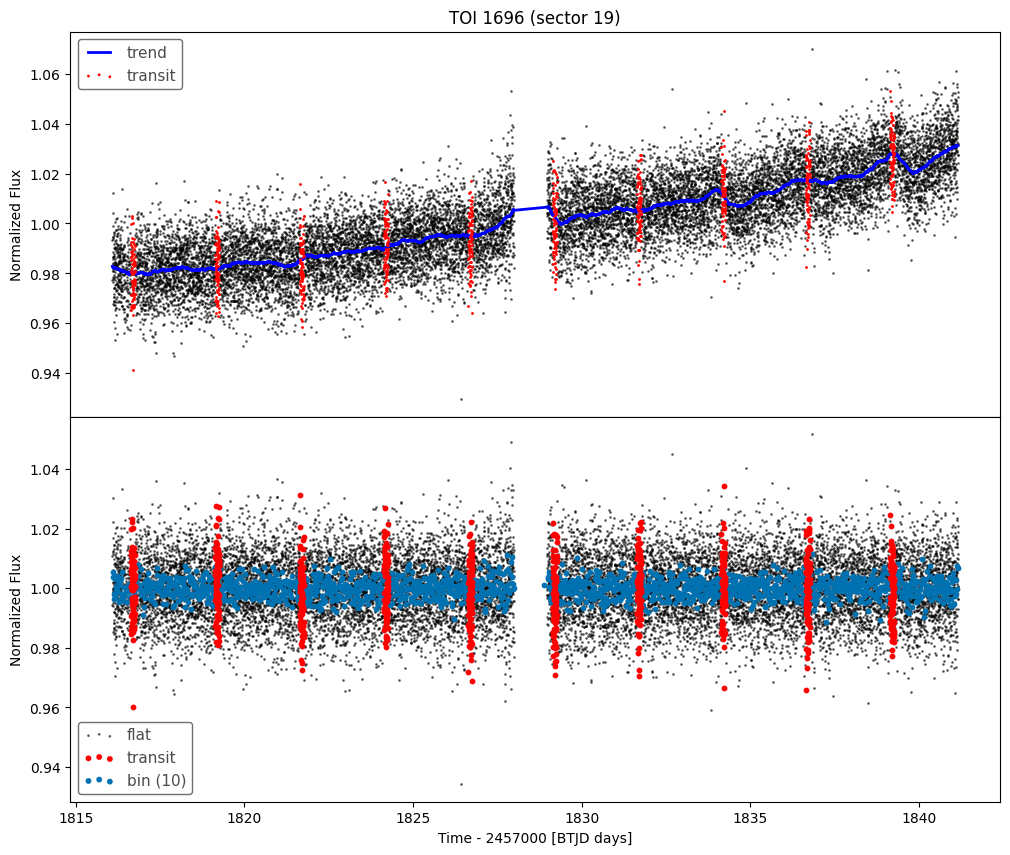

In [5]:
#plot raw, trend and flattened lc
#transits are automatically masked if TOI ephemeris is known
fig = s.plot_trend_flat_lcs(sap, window_length=0.5)

Duration should be in hours.
Using biweight filter with window_length=0.50 day.


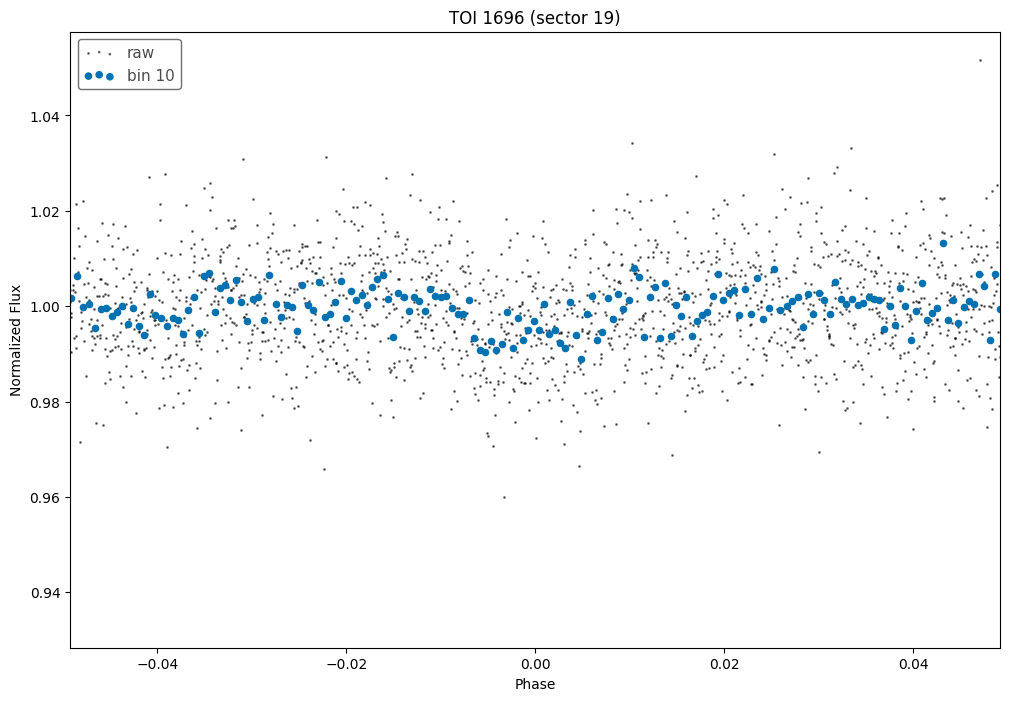

In [6]:
flat = s.get_flat_lc(sap, window_length=0.5)

#plot folded lc
ax = s.plot_fold_lc(flat)

## PDCSAP

In [7]:
#download PDCSAP lc
pdcsap = s.get_lc(lctype='pdcsap')

pdcsap = pdcsap.remove_outliers(sigma_upper=5)

Duration should be in hours.
Using period=2.5007 d, epoch=1816.70 BTJD, duration=0.98 hr.
Duration should be in hours.
Using biweight filter with window_length=0.50 day.


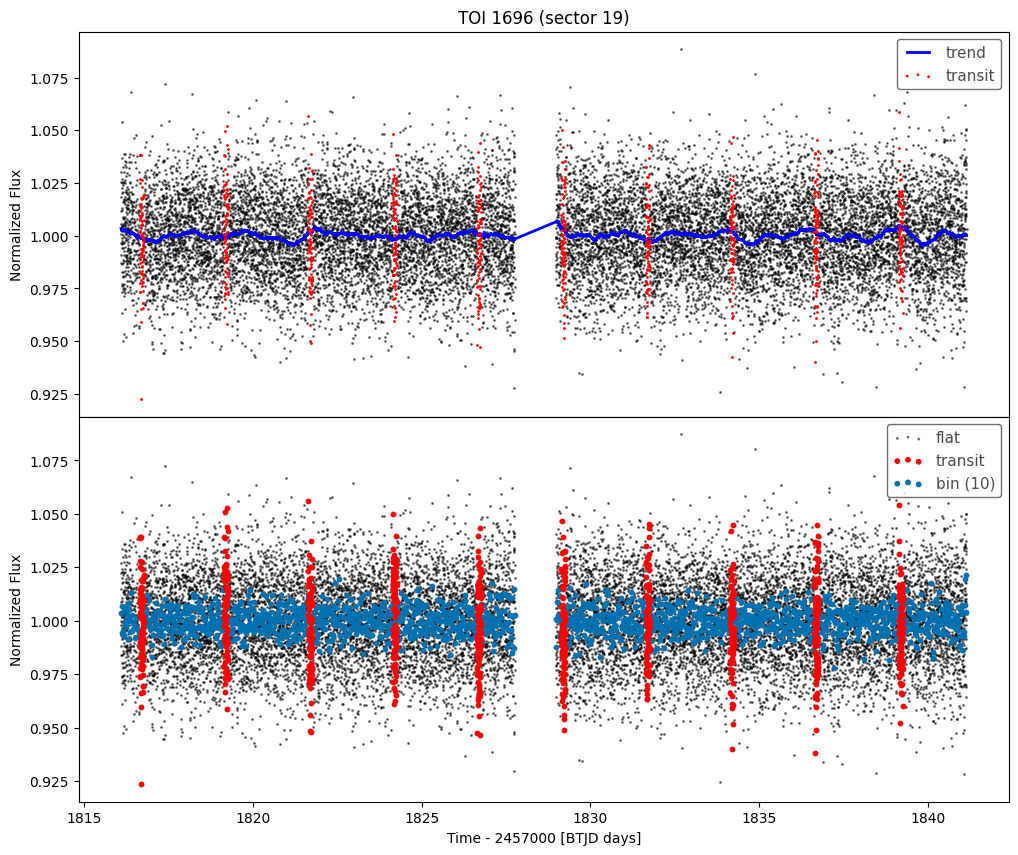

In [8]:
#plot raw, trend and flattened lc
#transits are automatically masked if TOI ephemeris is known
fig = s.plot_trend_flat_lcs(pdcsap, window_length=0.5)

Duration should be in hours.
Using biweight filter with window_length=0.50 day.


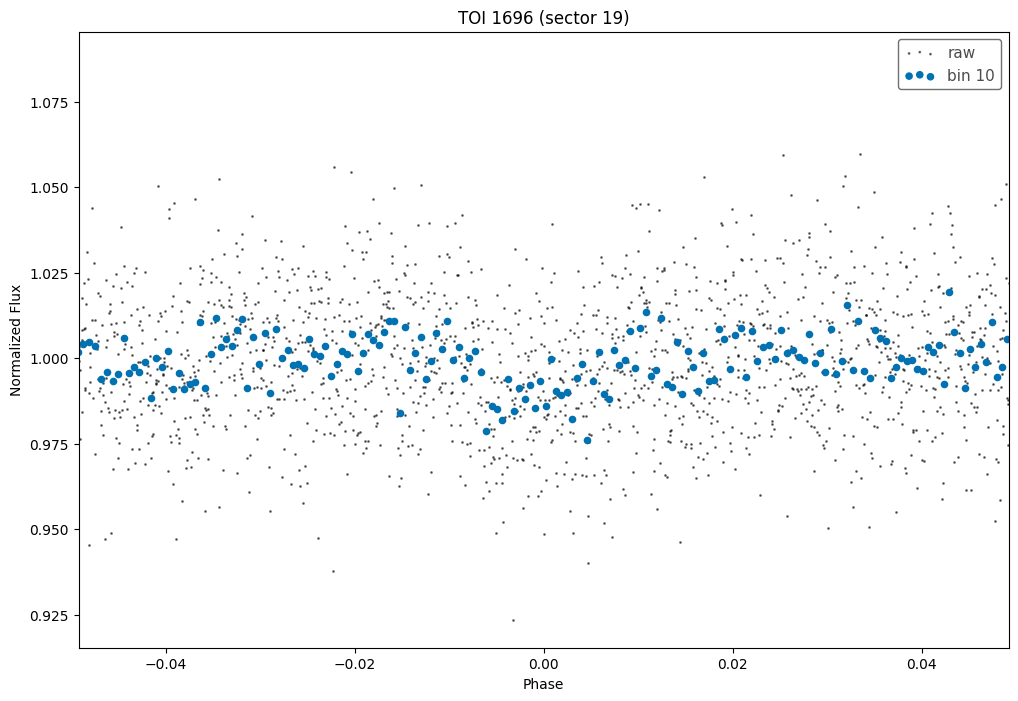

In [9]:
flat2 = s.get_flat_lc(pdcsap, window_length=0.5)

#plot folded lc
ax = s.plot_fold_lc(flat2)

## compare SAP and PDCSAP

(-0.05, 0.05)

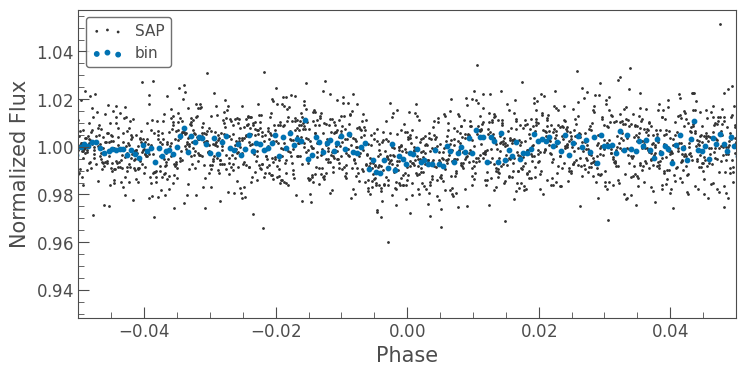

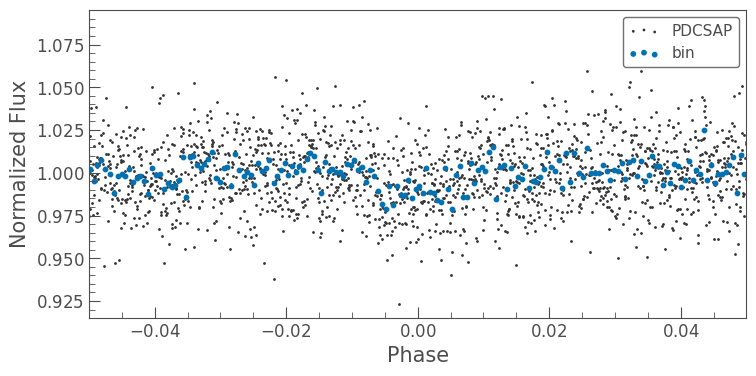

In [10]:
fold = flat.fold(period=s.toi_period, t0=s.toi_epoch)
ax = fold.scatter(label='SAP')
_ = fold.bin(10).scatter(ax=ax, label='bin', s=10)
ax.set_xlim(-0.05, 0.05)

fold2 = flat2.fold(period=s.toi_period, t0=s.toi_epoch)
ax2 = fold2.scatter(label='PDCSAP')
_ = fold2.bin(10).scatter(ax=ax2, label='bin', s=10)
ax2.set_xlim(-0.05, 0.05)

## TLS periodogram

  0%|          | 0/2251 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 17056 data points, 2251 periods from 0.601 to 12.532 days
Using all 8 CPU threads


100%|██████████| 2251/2251 periods | 00:40<00:00
  3%|▎         | 199/6849 [00:00<00:03, 1985.99it/s]

Searching for best T0 for period 2.50236 days


100%|██████████| 6849/6849 [00:02<00:00, 2685.10it/s]


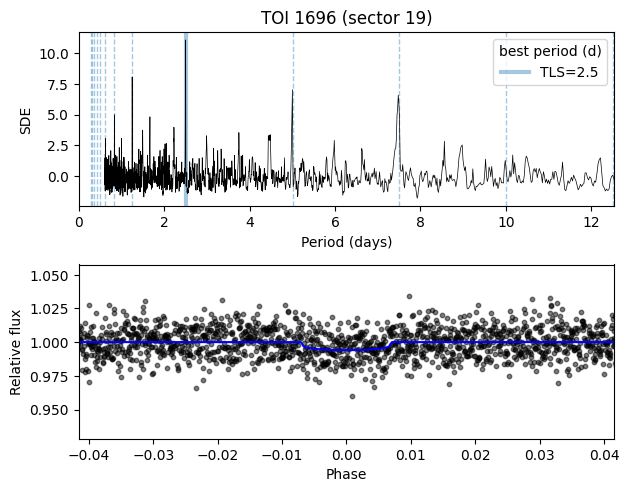

In [15]:
#using flattened SAP lc
fig = s.run_tls(flat, plot=True)

In [16]:
s.tls_results

{'SDE': 11.0629590843099,
 'SDE_raw': 10.476678491097145,
 'chi2_min': 1.893734137784818,
 'chi2red_min': 0.00011105642374998932,
 'period': 2.5023609127264974,
 'period_uncertainty': 0.005120073302664396,
 'T0': 1816.687303148492,
 'duration': 0.034665347357237544,
 'depth': 0.9940377151936914,
 'depth_mean': (0.994846550698313, 0.0006751286093876053),
 'depth_mean_even': (0.9935357614209216, 0.0009209981890650409),
 'depth_mean_odd': (0.9961253695055242, 0.0009719613291995116),
 'transit_depths': array([0.99510022, 0.99859204, 0.99420055, 0.99749277, 0.99198842,
        0.99368999, 0.99494623, 0.99770179, 0.99159582, 0.99310754]),
 'transit_depths_uncertainties': array([0.00235781, 0.00193272, 0.00194918, 0.00208871, 0.00191901,
        0.00244473, 0.00221921, 0.00227175, 0.00173001, 0.00185373]),
 'rp_rs': 0.06944060654330468,
 'snr': 7.6121847086417045,
 'snr_per_transit': array([2.17769062, 0.66706348, 2.6921566 , 1.16387899, 3.71905141,
        2.92916706, 2.39438457, 1.08884845,

In [13]:
s.toi_period, s.toi_epoch

(2.500715, 2458816.697706)

In [14]:
s.tls_results['period'], s.tls_results['T0']

(2.5023609127264974, 1816.687303148492)

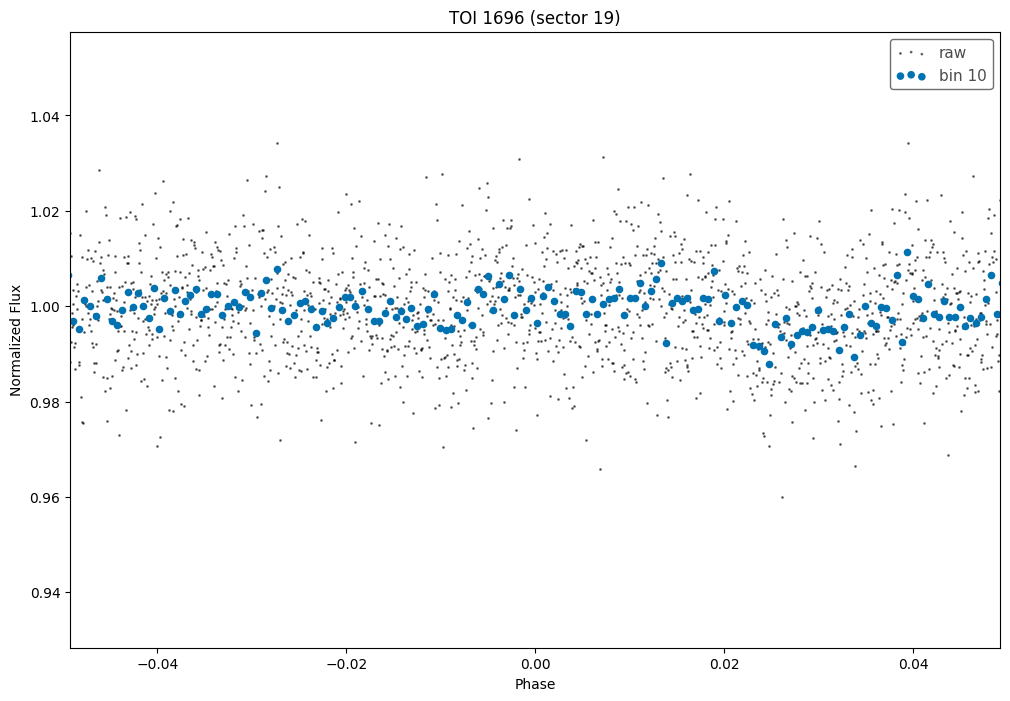

In [17]:
#plot folded lc using ephemeris from Mori+ paper
#epoch seems offset

ax = s.plot_fold_lc(flat,
                    period=2.50079, 
                    epoch=2206.74743
                   )

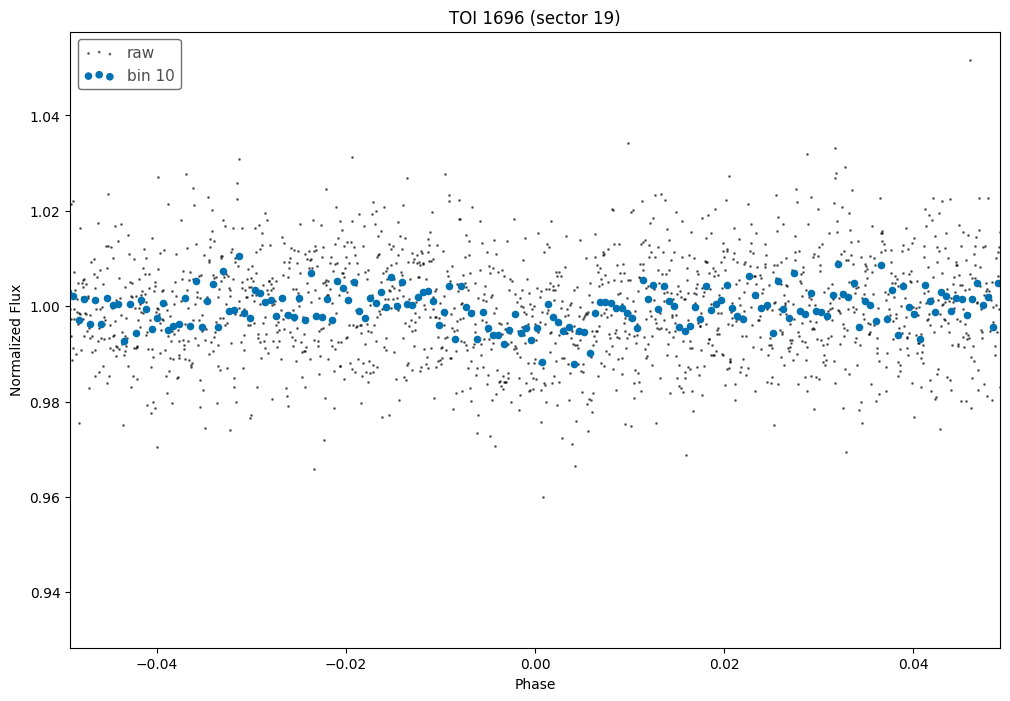

In [18]:
#plot folded lc using TOI ephem
ax = s.plot_fold_lc(flat,
                    period=s.tls_results['period'],
                    epoch=s.tls_results['T0']
                   )

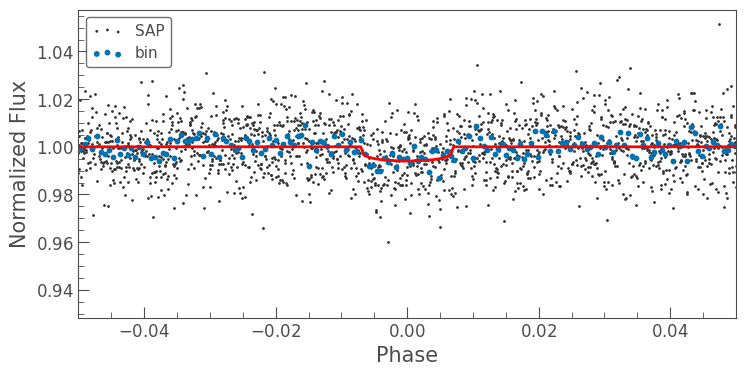

In [75]:
import matplotlib.pyplot as pl

fold = flat.fold(period=s.toi_period, t0=s.toi_epoch+0.00025)
ax = fold.scatter(label='SAP')
_ = fold.bin(10).scatter(ax=ax, label='bin', s=10)

t = s.tls_results['model_folded_phase']-0.5
f = s.tls_results['model_folded_model']
ax.plot(t, f, 'r-', lw=2)

ax.set_xlim(-0.05, 0.05)

ax.figure.savefig('../data/lc/tess_sap_folded.pdf', bbox_inches='tight')

## mask transit and search for additional periodic signals

In [23]:
tmask = cr.get_transit_mask(flat,
                            period=s.toi_period,
                            epoch=s.toi_epoch,
                            duration_hours=s.toi_duration
                           )
tmask

array([False, False, False, ..., False, False, False])

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

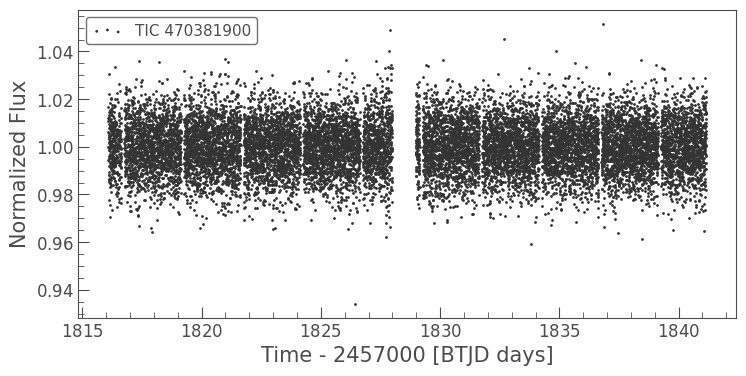

In [24]:
masked_lc = flat[~tmask]
masked_lc.scatter()

  0%|          | 0/2251 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 16187 data points, 2251 periods from 0.601 to 12.532 days
Using all 8 CPU threads


100%|██████████| 2251/2251 periods | 00:18<00:00
  4%|▍         | 408/10054 [00:00<00:02, 4073.30it/s]

Searching for best T0 for period 6.62549 days


100%|██████████| 10054/10054 [00:02<00:00, 4419.77it/s]


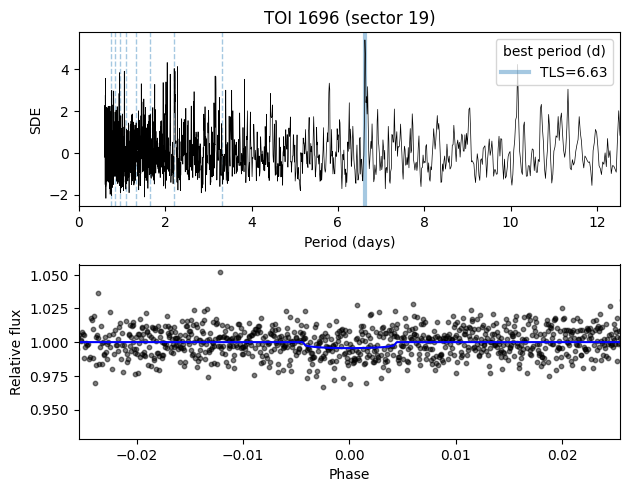

In [25]:
fig2 = s.run_tls(masked_lc, plot=True)

No more strong periodic signal left.

## Save lc

In [59]:
fp = '../data/lc/tess_folded.csv'

columns_to_save = ['time', 'flux', 'flux_err']
df = fold.to_pandas()[columns_to_save]
df.to_csv(fp, sep=' ', header=False, index=False)